# HW02- Visualize Real Estate Data

**Importing Libraries**
Below are the libararies that we will be using in this assignment.Namely,
- `numpy`: For numerical operations.
- `pandas`: For data manipulation and analysis.
- `matplotlib.pyplot`: For creating static, animated, and interactive visualizations in Python.
- `seaborn`: For statistical data visualization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#style options
%matplotlib inline
pd.set_option('display.max_columns',500) #allows for up to 500 columns to be displayed when
pd.set_option('display.max_rows',15) #allows for up to 500 rows to be displayed when
#if you want graphs to automatically without plt.show
#plt.style.use('seaborn') # using seaborn style is creating some problems so used ggplot
plt.style.use('ggplot') # using ggplot style 

**Importing Dataset**
Now, we will import the dataset using `pandas`. The dataset is a CSV file containing real estate data, which includes various features such as price, area, number of rooms, and more.


In [2]:
df_realestate = pd.read_csv('data/Real Estate Data - Week 2.csv')


## Create Groupby DataFrames and Barplot
### Section 5a: Create the df_results dataframe
In this section, we will create a new DataFrame called `df_results` by grouping the `Dwelling` and showin the mean of `Sale Price` and short them from higest to Lowest.


In [3]:
df_result = df_realestate.groupby('Dwelling Type').agg({'Sale Price': ['mean']}).reset_index()
df_result.columns = ['Dwelling Type', 'Sale Price']  # Flatten multi-level columns
df_result = df_result.sort_values(by='Sale Price', ascending=False)
print(df_result)

           Dwelling Type     Sale Price
7   2-STORY 1946 & NEWER  232236.602740
3            1-STORY PUD  200779.080460
5   2-1/2 STORY ALL AGES  196633.333333
2   1-STORY 1946 & NEWER  183983.785579
11  SPLIT OR MULTI-LEVEL  169775.789474
6   2-STORY 1945 & OLDER  165833.896552
10           SPLIT FOYER  147810.000000
0   1-1/2 STORY ALL AGES  145642.956522
8            2-STORY PUD  138647.380952
9                 DUPLEX  134271.272727
4    2 FAMILY CONVERSION  129755.555556
1   1-STORY 1945 & OLDER   98415.338710


Looking at the above table, we can see that the 2-StORY 1946 & NEWER has the highest average sale price and the 1-STORY 1946 & NEWER has the lowest average sale price. Even if we can look at the shorted table above to see which one is on top and which one is on the bottom, best way to understand the data is to visualize it using a bar plot which is more intuitive and easier to interpret to non-technical audiences.This is what we will do in the next section.

### Section 5b: Create a barplot based on the Dwelling Type

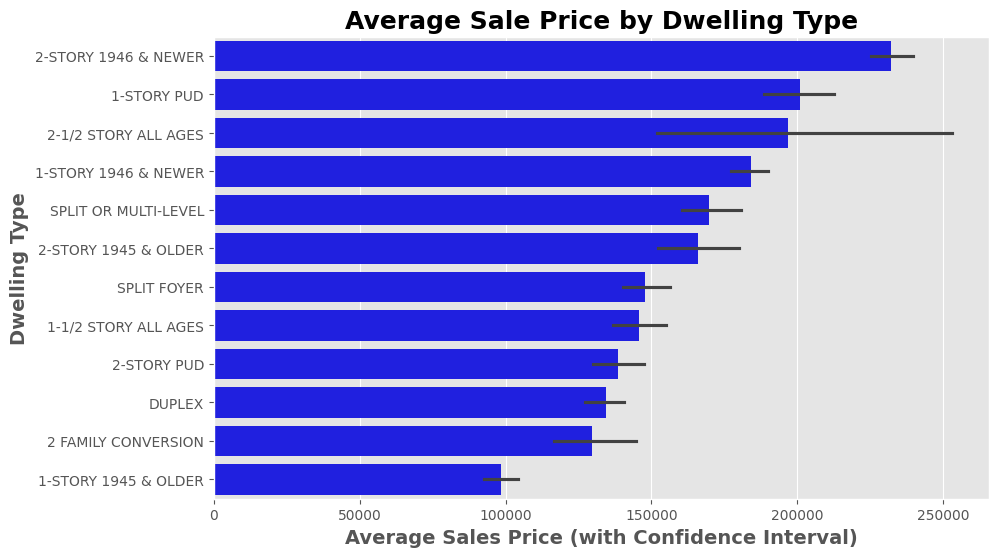

In [4]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Sale Price", y="Dwelling Type", data=df_realestate, order=df_result['Dwelling Type'], color='b')
plt.title('Average Sale Price by Dwelling Type', fontweight='bold', fontsize=18, horizontalalignment='center')
plt.xlabel('Average Sales Price (with Confidence Interval)', fontweight='bold', fontsize=14, horizontalalignment='center')
plt.ylabel('Dwelling Type', fontweight='bold', fontsize=14, horizontalalignment='center')
plt.show()

The barplot shows the average sale price for each dwelling type, sorted from highest to lowest. This visualization makes it easier to compare the average prices across different dwelling types. The black line represents the confidence interval, which gives an idea of the variability of the average sale price for each dwelling type. In dewlling types 2-1/2 STORY ALL AGES we can see that the confidence interval is very big, which means that the average sale price is not very reliable and can vary significantly. On the other hand, in 1-STORY 1946 & NEWER the confidence interval is very small, which means that the average sale price is very reliable and does not vary much. As we can see, the 2-STORY 1946 & NEWER has the highest average sale price, while the 1-STORY 1946 & NEWER has the lowest average sale price. This is consistent with the table we created earlier.

### Section 5c: Create a Barplot Based on the Location condition 


In [5]:
df_locCond = df_realestate.groupby('Location Condition').agg({'Sale Price': 'count'}).reset_index()
df_locCond = df_locCond.sort_values(by='Sale Price', ascending=False)
var_total = df_locCond['Sale Price'].sum()
df_locCond['Percent'] = df_locCond['Sale Price'] / var_total

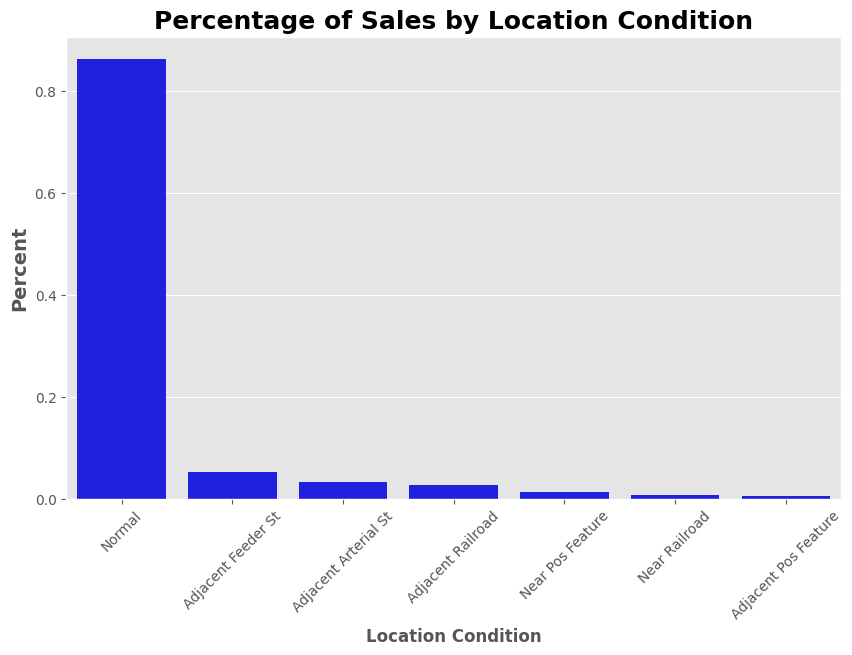

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Location Condition', y='Percent', data=df_locCond, color='b')
plt.title('Percentage of Sales by Location Condition', fontweight='bold', fontsize=18, horizontalalignment='center')
plt.xlabel('Location Condition', fontweight='bold', fontsize=12, horizontalalignment='center')
plt.ylabel('Percent', fontweight='bold', fontsize=14, horizontalalignment='center')
plt.xticks(rotation=45)  # Rotate x-axis labels to prevent overlapping
plt.show()

The barplot illustrates the percentage of sales for each location condition. Looking at the barplot, we can see that the majority of Sales are in the `Normal` condition, followed by `Adjacent Feeder St` and lowest is `Adjacent Pos Feature`. This visualization helps us understand the distribution of sales across different location conditions, making it easier to identify trends and patterns in the data.

## 6 Create Distributions with Histograms and (Boxplots, Violoinplots, and Boxenplots)

### Section 6a: Histogram of Living Area Above Grade

Creating a histogram is one of the most common ways to visualize the distribution of a single variable. Basically, we will try to indentify the distribution by observing the shape of the histogram. In this case, we are looking at the distribution of the `Living Area Above Grade` variable.

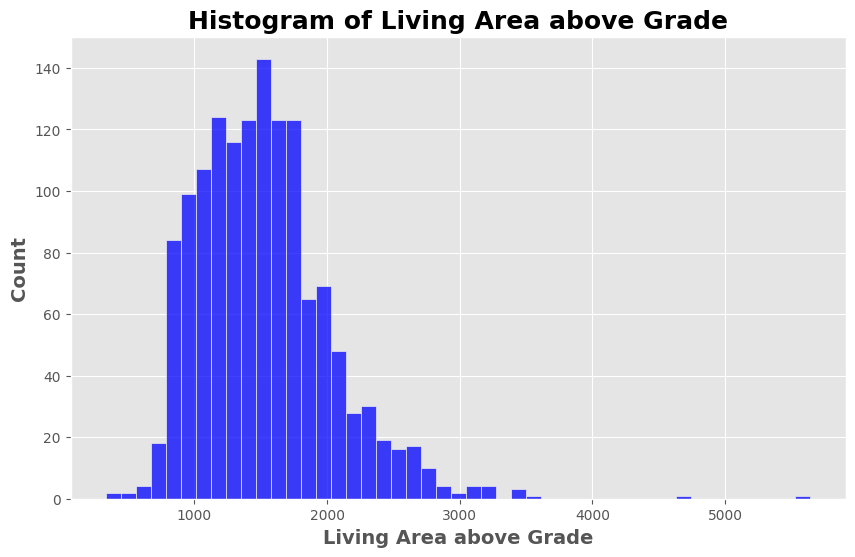

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df_realestate['Living Area Above Grade'], kde=False, color='b')
plt.title('Histogram of Living Area above Grade', fontweight='bold', fontsize=18, horizontalalignment='center')
plt.xlabel('Living Area above Grade', fontweight='bold', fontsize=14, horizontalalignment='center')
plt.ylabel('Count', fontweight='bold', fontsize=14, horizontalalignment='center')
plt.show()

From the above histogram, we can see most of the houses have a living area above grade between 1000 and 2000 square feet, with a peak around 1500 square feet. The distribution is slightly right-skewed, indicating that there are some houses with larger living areas above grade, but the majority fall within the 1000 to 2000 square feet range. Also, we can see that there are some houses with very high living area above grade, which are outliers in the dataset. These outliers can affect the mean and standard deviation of the distribution, so it is important to keep them in mind when analyzing the data.

### Section 6b: Boxenplot of Sale Price by Kitchen Quality Rating
In this section, we will create a boxenplot to visualize the distribution of `Sale Price` based on the `Kitchen Quality Rating`. A boxenplot is a variation of a boxplot that is particularly useful for visualizing distributions with many outliers.

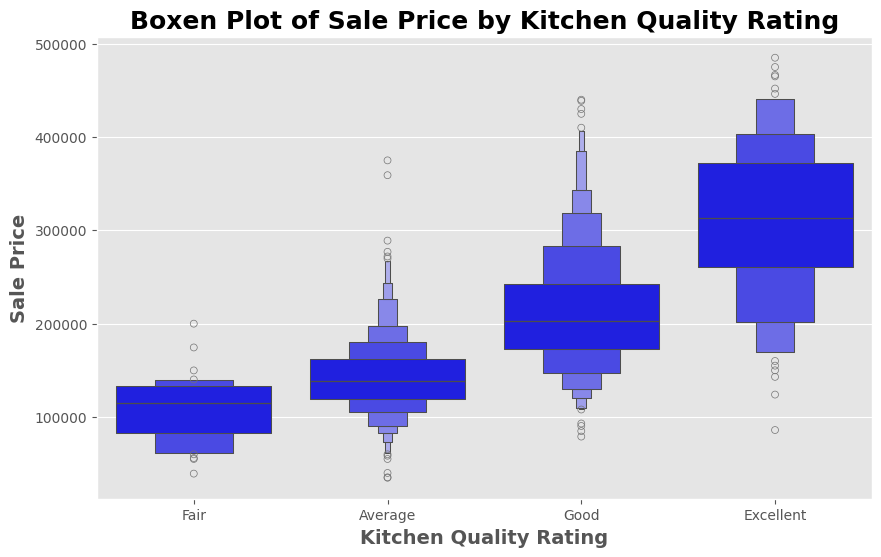

In [8]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Kitchen Qual', y='Sale Price', data=df_realestate, color='b', order=['Fair', 'Average', 'Good', 'Excellent'])
plt.title('Boxen Plot of Sale Price by Kitchen Quality Rating', fontweight='bold', fontsize=18, horizontalalignment='center')
plt.xlabel('Kitchen Quality Rating', fontweight='bold', fontsize=14, horizontalalignment='center')
plt.ylabel('Sale Price', fontweight='bold', fontsize=14, horizontalalignment='center')
plt.show()

From the above Boxenplot, we can see that the `Sale Price` varies significantly based on the `Kitchen Quality Rating`. The median sale price is highest for  (Excellent) kitchen quality, followed by  (Good), (Average), and lowest for  (Fair) and (Poor) kitchen quality ratings. The boxenplot also shows the presence of outliers in the dataset, particularly for the kitchen quality rating, where there are several high sale prices that are significantly above the upper whisker of the boxenplot. This indicates that there are some houses with excellent kitchen quality that have sold for much higher prices than the majority of houses in that category.

### Section 6c: Create Z-Scores for Sale Price and Violinplot 

In [9]:
mean_price = df_realestate['Sale Price'].mean().__round__(3)
stdev_price = df_realestate['Sale Price'].std().__round__(3)
print(f"The mean sale price is $ {mean_price}")
print(f"The standard deviation of sale price is $ {stdev_price}")

The mean sale price is $ 181142.596
The standard deviation of sale price is $ 71523.888


In [10]:
df_realestate['z-score'] = (df_realestate['Sale Price'] - mean_price) / stdev_price

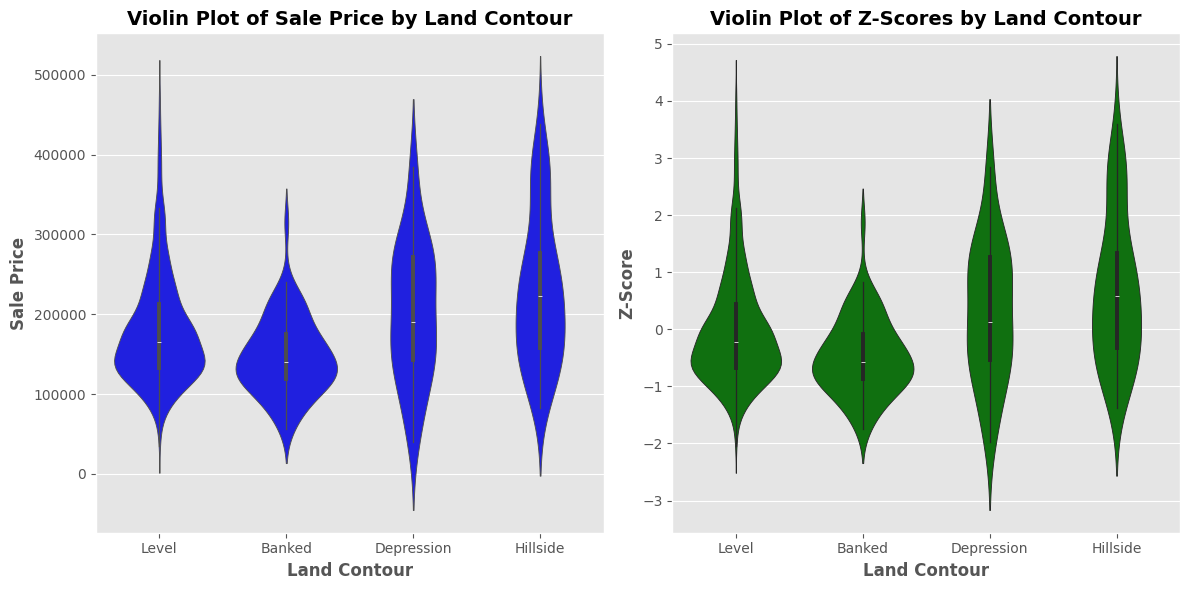

In [11]:
plt.figure(figsize=(12, 6))

# First violinplot for raw data
plt.subplot(121)
sns.violinplot(y='Sale Price', x='Land Contour', data=df_realestate, color='b')
plt.title('Violin Plot of Sale Price by Land Contour', fontweight='bold', fontsize=14)
plt.xlabel('Land Contour', fontweight='bold', fontsize=12)
plt.ylabel('Sale Price', fontweight='bold', fontsize=12)

# Second violinplot for z-scores
plt.subplot(122)
sns.violinplot(y='z-score', x='Land Contour', data=df_realestate, color='g')
plt.title('Violin Plot of Z-Scores by Land Contour', fontweight='bold', fontsize=14)
plt.xlabel('Land Contour', fontweight='bold', fontsize=12)
plt.ylabel('Z-Score', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

The subplot shows two violin plots: one for raw `Sale Price` and another for `z-scores` by `Land Contour`.Basically, what we need is standarized the value of sales price while doing so The shape of the distributions remains similar, but the y-axis for the z-score plot is standardized, making it easier to compare relative deviations across categories.

### Section 6d: Create Boxplot for Sale Price by Neighborhood 


C:\Users\krish\AppData\Local\Temp\ipykernel_7192\614084790.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sale Price', y='Neighborhood', data=df_realestate, palette='Set2')


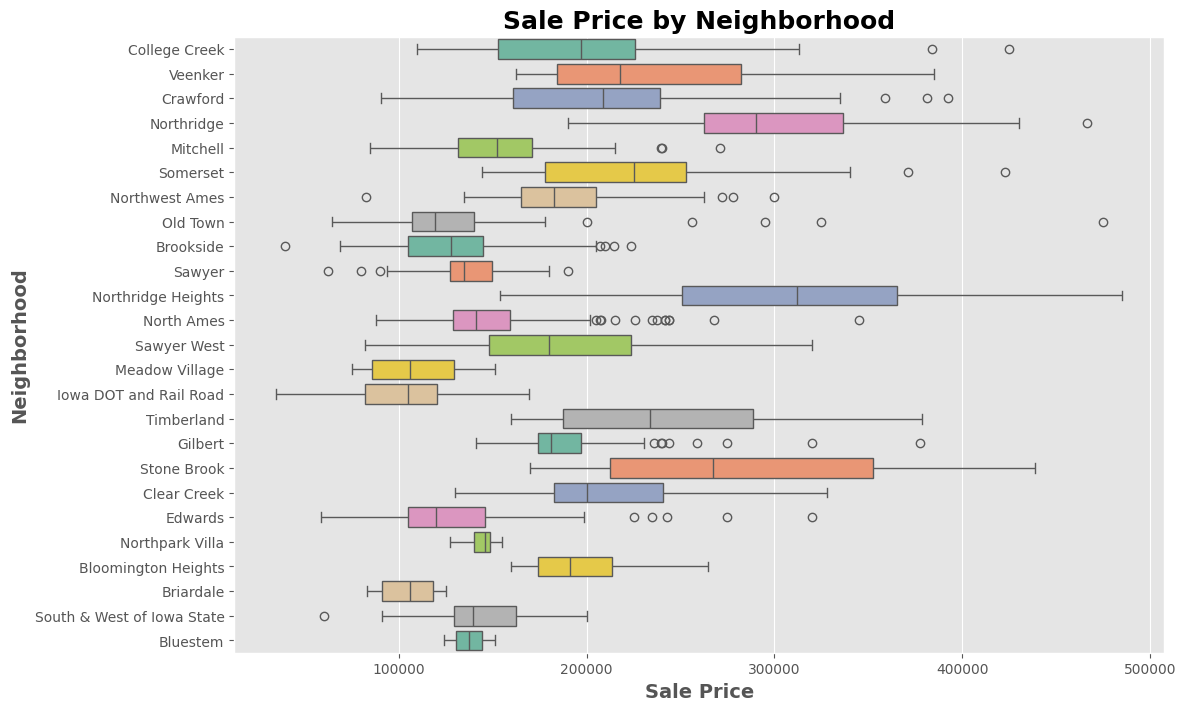

In [12]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Sale Price', y='Neighborhood', data=df_realestate, palette='Set2')
plt.title('Sale Price by Neighborhood', fontweight='bold', fontsize=18)
plt.xlabel('Sale Price', fontweight='bold', fontsize=14)
plt.ylabel('Neighborhood', fontweight='bold', fontsize=14)
plt.show()

The boxplot shows the distribution of `Sale Price` across different `Neighborhoods`. It highlights variations in sale prices, with some neighborhoods having higher median prices and others showing a wider range of values.

## 7. Comparing Features to Visualize a Relationship 


### Section 7a: Scatterplot for 1st and 2nd floor

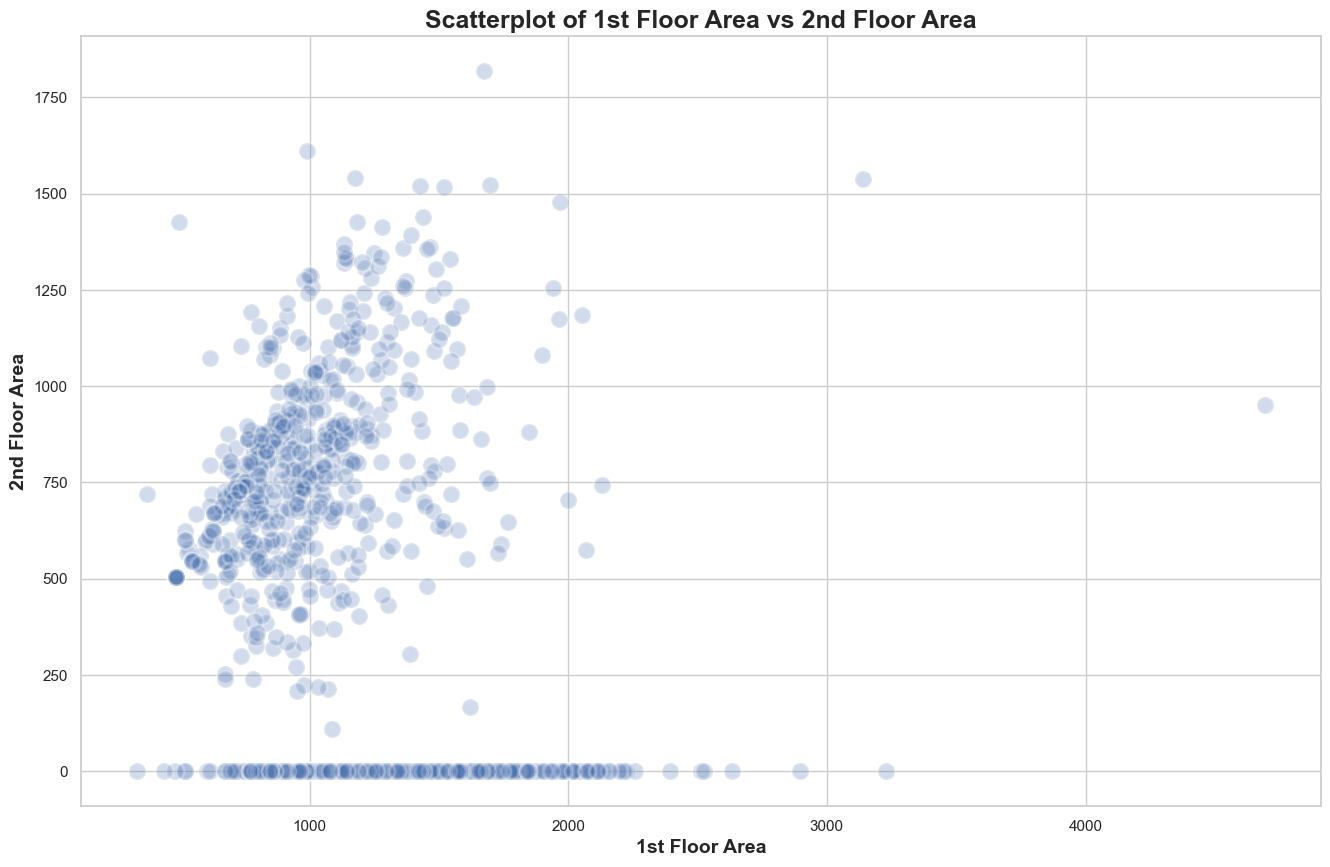

In [13]:
sns.set(style='whitegrid')
plt.figure(figsize=(16, 10))
sns.scatterplot(x='1st Floor Area', y='2nd Floor Area', alpha=0.25, data=df_realestate, s=150, edgecolor='white', linewidth=2)
plt.title('Scatterplot of 1st Floor Area vs 2nd Floor Area', fontweight='bold', fontsize=18)
plt.xlabel('1st Floor Area', fontweight='bold', fontsize=14)
plt.ylabel('2nd Floor Area', fontweight='bold', fontsize=14)
plt.show()

The scatterplot shows the relationship between the `1st Floor Area` and `2nd Floor Area`. Looking at he scatterplot, it is little hard to see the relationship between the two variables as we can see that there are many points along the horizontal axis passing y-axis equal to zero and also a cluster of points which shows relationship between the two variables.Instead of confirming the relationship between the two variables, we might want to look at other stastistics such as correlation coefficient or regression analysis to quantify the relationship between the two variables.

### Section 7b: Scatterplot for ‘Living Area Above Grade’ and ‘Sale Price’ and ‘Kitchen Quality’. 


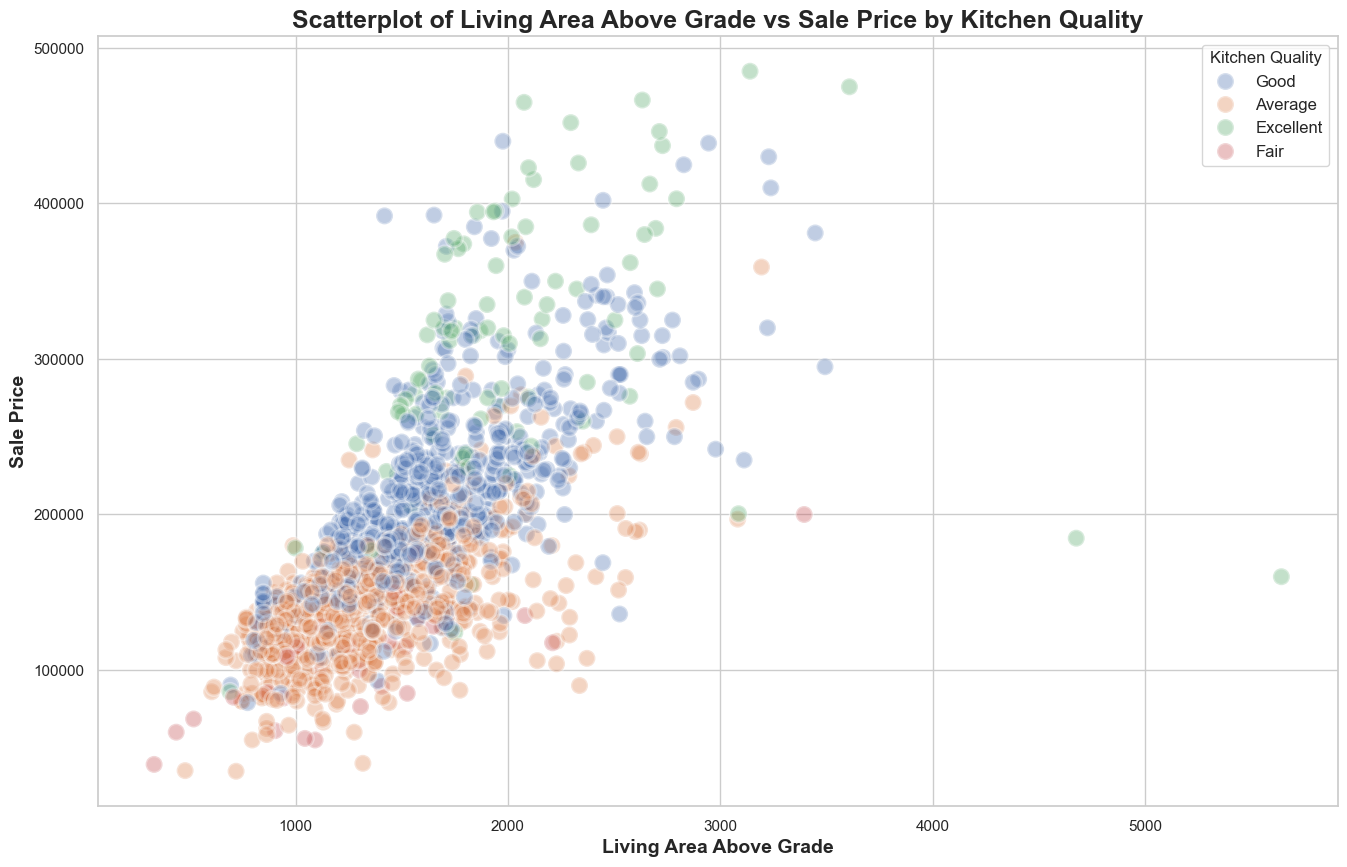

In [14]:
sns.set(style='whitegrid')
plt.figure(figsize=(16, 10))
sns.scatterplot(x='Living Area Above Grade', y='Sale Price', alpha=0.35, data=df_realestate, s=150, edgecolor='white', linewidth=2, hue='Kitchen Qual')
plt.title('Scatterplot of Living Area Above Grade vs Sale Price by Kitchen Quality', fontweight='bold', fontsize=18)
plt.xlabel('Living Area Above Grade', fontweight='bold', fontsize=14)
plt.ylabel('Sale Price', fontweight='bold', fontsize=14)
plt.legend(title='Kitchen Quality', fontsize=12)
plt.show()

The scatterplot shows the relationship between `Living Area Above Grade` and `Sale Price`, with points colored by `Kitchen Quality`. It highlights that houses with higher kitchen quality tend to have higher sale prices, and larger living areas above grade are generally associated with higher sale prices.Looking at the scatterplot, we can see that there is a positive correlation between `Living Area Above Grade` and `Sale Price`, meaning that as the living area above grade increases, the sale price also tends to increase. This is consistent with our expectations, as larger houses generally sell for higher prices. One thing to notice is that strength of the relationship varies by `Kitchen Quality` meaning for example, increase of pirce for houses with `Excellent` kitchen quality is much higher than houses with `Fair` kitchen quality with same living area above grade which we can see in color of the points in the scatterplot.

### Section 7c: Create a Pairplot

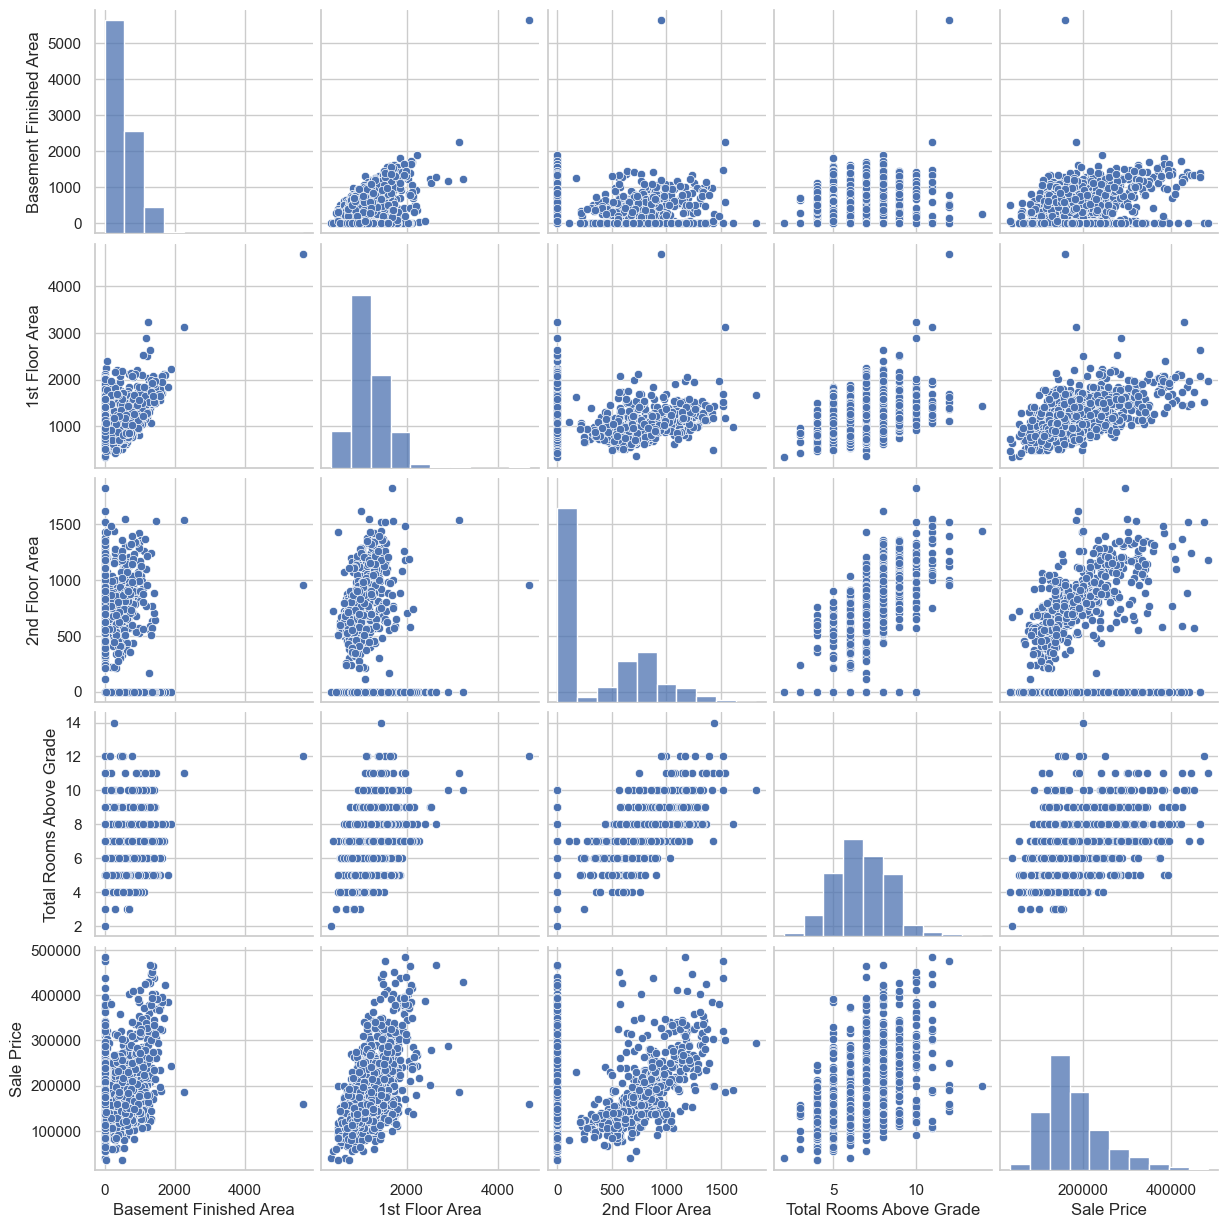

In [15]:
df_pairplot = df_realestate[['Basement Finished Area', '1st Floor Area', '2nd Floor Area', 'Total Rooms Above Grade', 'Sale Price']]
sns.pairplot(df_pairplot, diag_kind='hist', diag_kws={'bins':10})
plt.show()

The pairplot provides a visual representation of relationships between selected features, including `Basement Finished Area`, `1st Floor Area`, `2nd Floor Area`, `Total Rooms Above Grade`, and `Sale Price`. It highlights potential correlations and distributions, aiding in identifying trends and patterns in the data.

## Summary

In this assignment, we explored a real estate dataset using various visualization techniques. We created groupby DataFrames to analyze average sale prices by dwelling type and location condition, visualized distributions with histograms, boxenplots, and violin plots, and examined relationships between features using scatterplots and pairplots. These visualizations helped us understand the data better, identify trends, and communicate findings effectively. With the assignment complete, we used visualization to find relationships and patterns in the real estate data, making it easier to draw insights and conclusions with the use of some statistical hypothesis or model bulding.